The purpose of this notebook is to look at the genres available in the decades and the genres datasets.  If the distribution is normal(-ish) in a particular dataset than it is a good candidate for the project.  All other things being equal, I would prefer to use the genres dataset as it is bigger and the lyrics have not yet been cleaned.  I am concerned that the already-cleaned lyrics in decades will not give me enough information to prove the hypothesis, that we can predict a genre given a set of lyrics.

In [1]:
import pandas as pd
import numpy as np
import s3fs
import os
import io
import boto3

import s3fs
fs = s3fs.S3FileSystem(anon=False,key='###'',secret='KIyIZWD7VHskWyBECckZr6/KNizFiu+7AtbdaJIg')

In [3]:
from dotenv import load_dotenv
load_dotenv(verbose=True)

def aws_session(region_name='us-east-1'):
    return boto3.session.Session(aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'), #looks for any .env file
                                aws_secret_access_key=os.getenv('AWS_ACCESS_KEY_SECRET'), #Has to be in same directory
                                region_name=region_name) #from above

def make_bucket(name, acl): 
    session = aws_session()
    s3_resource = session.resource('s3')
    return s3_resource.create_bucket(Bucket=name, ACL=acl)

def upload_file_to_bucket(bucket_name, file_path):
    session = aws_session()
    s3_resource = session.resource('s3')
    file_dir, file_name = os.path.split(file_path)

    bucket = s3_resource.Bucket(bucket_name)
    bucket.upload_file(
      Filename=file_path,
      Key=file_name,
      ExtraArgs={'ACL': 'public-read'}
    )

    s3_url = f"https://{bucket_name}.s3.amazonaws.com/{file_name}"
    return s3_url

def download_file_from_bucket(bucket_name, s3_key, dst_path):
    session = aws_session()
    s3_resource = session.resource('s3')
    bucket = s3_resource.Bucket(bucket_name)
    bucket.download_file(Key=s3_key, Filename=dst_path)

In [4]:
!aws s3 ls 'wrangled-1'

2021-04-17 12:39:34   36238559 Main2_25k.csv
2021-04-17 13:07:17  144547686 big2_df.csv
2021-04-17 12:42:21  187833123 big_no_genre_df.csv
2021-04-17 12:40:50   14278350 decades_df.csv
2021-04-17 12:43:37  144584439 merged3_genre_df.csv


In [5]:
decades_df = pd.read_csv('s3://wrangled-1/decades_df.csv')

In [8]:
decades_df.keys()

Index(['original_csv', 'artist_name', 'song_name', 'link', 'lyrics',
       'language', 'genre', 'date'],
      dtype='object')

In [11]:
decades_df.groupby(['genre']).count()

,original_csv,artist_name,song_name,link,lyrics,language,date
genre,,,,,,,
blues,4604,4604,4604,0,4604,0,4604
country,5445,5445,5445,0,5445,0,5445
hip hop,904,904,904,0,904,0,904
jazz,3845,3845,3845,0,3845,0,3845
pop,7042,7042,7042,0,7042,0,7042
reggae,2498,2498,2498,0,2498,0,2498
rock,4034,4034,4034,0,4034,0,4034


In [6]:
genres_df = pd.read_csv('s3://wrangled-1/merged3_genre_df.csv')

In [10]:
genres_df.keys()

Index(['original_csv', 'artist_name', 'song_name', 'link', 'lyrics',
       'language', 'genre', 'date'],
      dtype='object')

In [12]:
genres_df.groupby(['genre']).count()

,original_csv,artist_name,song_name,link,lyrics,language,date
genre,,,,,,,
Funk Carioca,69,69,69,69,69,69,0
Hip Hop,16144,16144,16144,16144,16144,16144,0
Pop,28442,28442,28442,28442,28442,28442,0
Rock,50160,50160,50160,50160,50160,50160,0
Samba,42,42,42,42,42,42,0
Sertanejo,58,58,58,58,58,58,0


In [13]:
import matplotlib.pyplot as plt

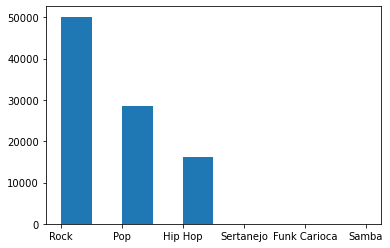

In [44]:
plt.hist(pd.DataFrame((genres_df),columns=['genre']))
plt.show()

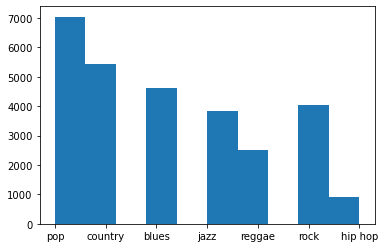

In [45]:
plt.hist(pd.DataFrame((decades_df),columns=['genre']))
plt.show()

TypeError: float() argument must be a string or a number, not 'NoneType'

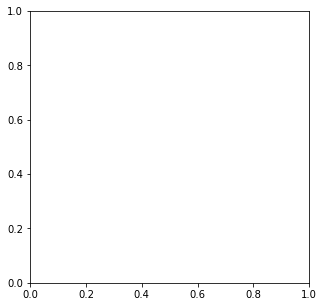

In [41]:
## doesn't work.  Because small, small is a none type.

slim = pd.DataFrame((genres_df),columns=['genre','artist_name'])
small = slim.groupby(['genre']).count()

fig = plt.figure(figsize = (5,5))

plt.bar(small, small, color = 'blue', width = 0.4)

plt.xlabel("Genre")
plt.ylable("Number of Songs")
plt.title("Genres Counts")
plt.show()

In [46]:
decades_df.iloc[5942]['lyrics']#decades Taylor Swift The Story of Us

'think tell story spark fly instantly people ones know place spot search room seat cause lately know simple complication lead fallout things wish know wall break stand crowd room speak die know kill like kill yeah know twist fate break story look like tragedy chapter nervously pull clothe try look busy best avoid start think tell story lose mind hold pride like hold scar end pretend tell miss know hear silence loud stand crowd room speak die know kill like kill yeah know twist fate break story look like tragedy look like contest like care like better battle hand armor fight things wish know story end soon stand crowd room speak die know kill like kill yeah know twist fate break story look like tragedy speak die know kill like kill yeah know twist fate cause go story look like tragedy'

In [47]:
genres_df.iloc[92417]['lyrics']#genres Taylor Swift The Story of Us

"I used to think one day we'd tell the story of us. How we met and sparks flew instantly. People would say 'They're the lucky ones'. I used to know my place was a spot next to you. Now I'm searching the room for an empty seat. 'Cause lately I don't even know what page you're on. Oh. A simple complication, miscommunication. Has lead to fallout. Too many things that I wish you knew. So many walls up I can't break through. Now I'm standing alone in a crowded room. And we're not speaking. And I'm dying to know. Is it killing you like it's killing me?. And I don't know what to say. Since the twist of fate. When it all broke down. And the story of us looks a lot like a tragedy now. Next chapter. How'd we end up this way?. Se me nervously pulling at my clothes. And trying to look busy. And you're doing your best to avoid me. I'm starting to think one day I'll tell the story of us. How I was losing my mind when I saw you here. But you held your pride like you should've held me. Oh. I'm scared 